# Image orientation classification using MobileNet model

## To run this notebook you need:

0. Trained and estimated on images in 75x75/224x224 resolution and RGB format (training dataset format) (use C:\Users\User\DataScience\area51\notebooks\3_prepare_data.ipynb to prepare data) in order to make it comparable to the ResNet50 models




In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# specify constructor parameters

# model_name = "mobnet_without_augment"
# model_name = "mobnet_with_augment"
# model_name = "mobnet_augment_unfreeze_4_layers"

imgResolution = (224,224)
imgResStr = f"{imgResolution[0]}x{imgResolution[1]}"
model_name = f"{imgResStr}_mobnet_without_augment"
test_dataset_dir = rf"C:\Users\User\DataScience\area51\data_{imgResStr}\test_{imgResStr}"
train_valid_dataset_dir = rf"C:\Users\User\DataScience\area51\data_{imgResStr}\train_val_{imgResStr}"

basic_params = {  # 1. basics
            "img_resolution" : imgResolution,
            "model_prefix": model_name,
            "model_dir": rf"C:\Users\User\DataScience\area51\models\mobnet\{model_name}",
            "data_dir": r"C:\Users\User\DataScience\area51\data\COVID-19_Radiography_Dataset",
            "train_valid_dataset_dir": train_valid_dataset_dir,
            "test_dataset_dir": test_dataset_dir,
            "test_dataset_desc": rf'''
test dataset dir: {test_dataset_dir}
dataset contains images:
# rotation    :       image count
# 0°          :       12
# +90         :       13
# -90         :       13
# 180°        :       14
                                    ''',
}
# params for image_dataset_from_directory(...)
data_load_params = {
                    "directory": train_valid_dataset_dir,
                    "batch_size" : 32,
                    "seed": 1,
                    "label_mode": "categorical",
                    "color_mode": "rgb",        # resNet requires 3 channel otherwise needs to be trained from scratch 
                    "image_size": imgResolution,   # img_height, img_width
                    "shuffle": True,
                    "validation_split": 0.2,
                    "labels": "inferred",         #derive from folder structure
}
# Compilation parameters for functional/sequential model.compile(...)
model_params = {  
                    "input_shape": (imgResolution[0], imgResolution[1], 3), # input shape for the model (height, width, channels)
                    "optimizer": 'adam',
                    "loss": "categorical_crossentropy", #loss function
                    "metrics": ['accuracy'],
                    "layers_to_unfreeze": 0, 
}


from src.models.imageorientation import OrientationEstimatorMobileNet

# initialize the estimator object
oem = OrientationEstimatorMobileNet(**basic_params)




Found 24056 files belonging to 4 classes.
Using 19245 files for training.
Found 24056 files belonging to 4 classes.
Using 4811 files for validation.
Number of batches in train_ds: 602
Number of batches in val_ds: 151
encoded label samples:  [[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]
images.shape:  (32, 224, 224, 3)


<string>:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.


The 224x224_mobnet_without_augment model has been compiled successfully
Epoch 1/40
602/602 ━━━━━━━━━━━━━━━━━━━━ 218s 360ms/step - accuracy: 0.8944 - loss: 0.2545 - val_accuracy: 0.9728 - val_loss: 0.0664 - learning_rate: 0.0010
Epoch 2/40
602/602 ━━━━━━━━━━━━━━━━━━━━ 219s 364ms/step - accuracy: 0.9793 - loss: 0.0583 - val_accuracy: 0.9709 - val_loss: 0.0747 - learning_rate: 0.0010
Epoch 3/40
602/602 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.9853 - loss: 0.0410
Reached target validation accuracy of 98.00% at epoch 3. Stopping training.
602/602 ━━━━━━━━━━━━━━━━━━━━ 219s 363ms/step - accuracy: 0.9853 - loss: 0.0410 - val_accuracy: 0.9836 - val_loss: 0.0462 - learning_rate: 0.0010
orientation_classifier_224x224_mobnet_without_augment.keras training_history_224x224_mobnet_without_augment.json stored to  C:\Users\User\DataScience\area51\models\mobnet\224x224_mobnet_without_augment
model accuracy & loss for: 224x224_mobnet_without_augment
{'accuracy': [0.9503247737884521, 0.98046243190

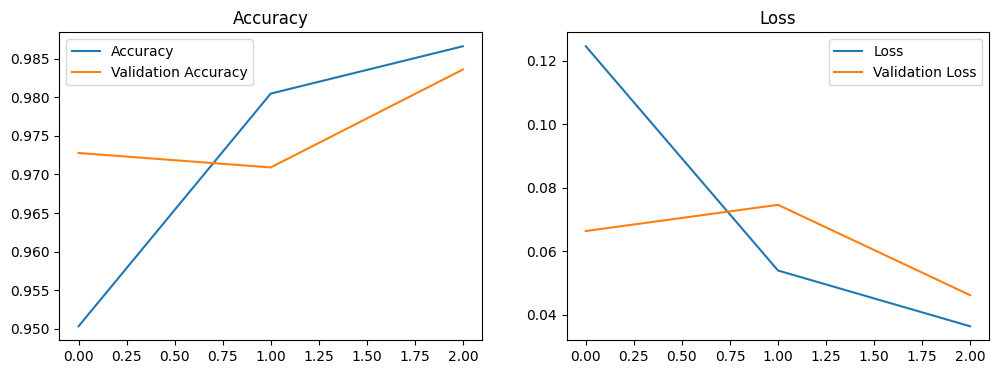

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━

C:\Users\User\DataScience\area51\src\models\imageorientation.py:329: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(results)], ignore_index=True)


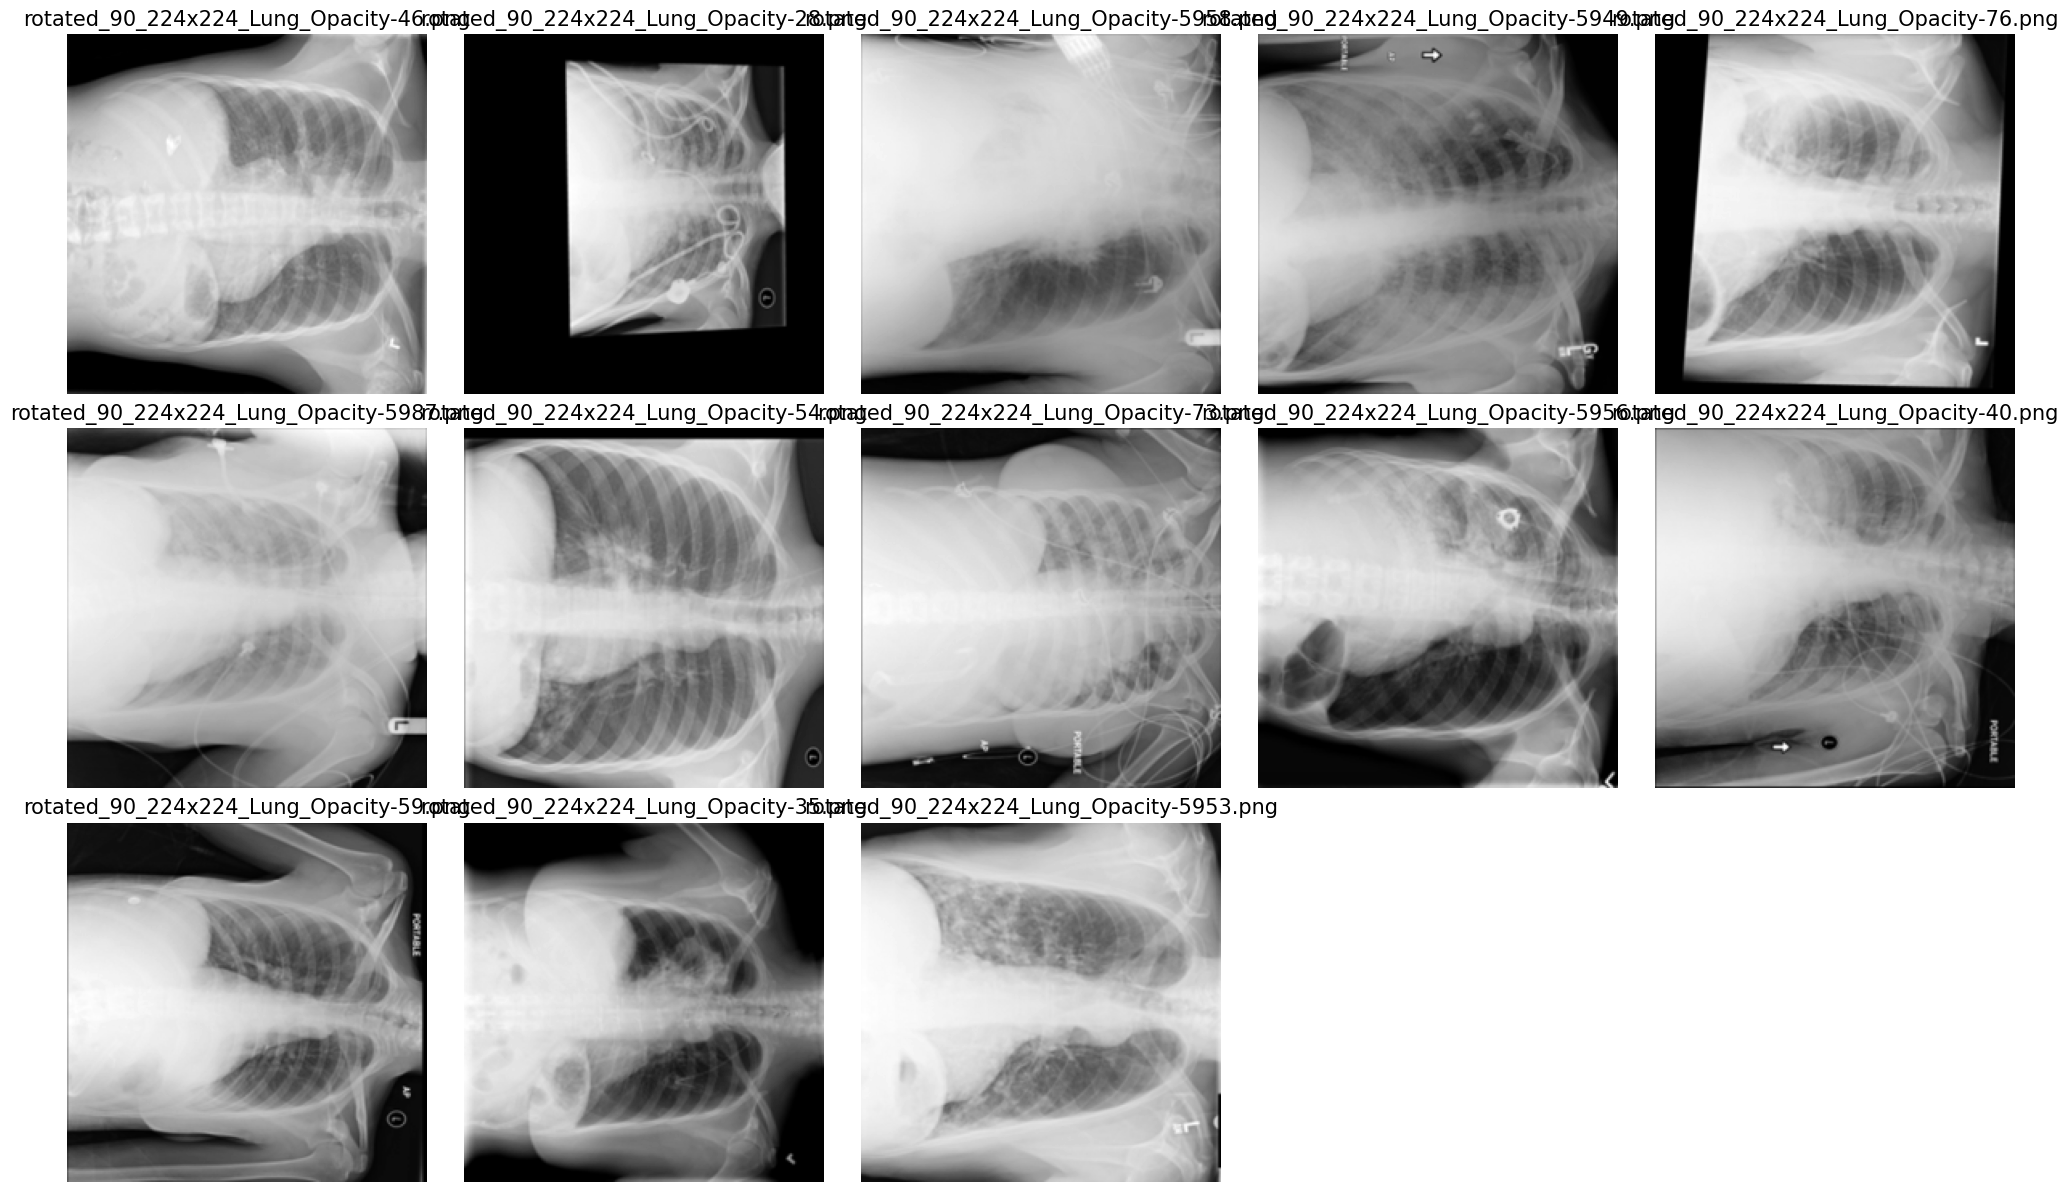


test_data --> estimated orientation: rotated_minus_90 --> total detected: 13


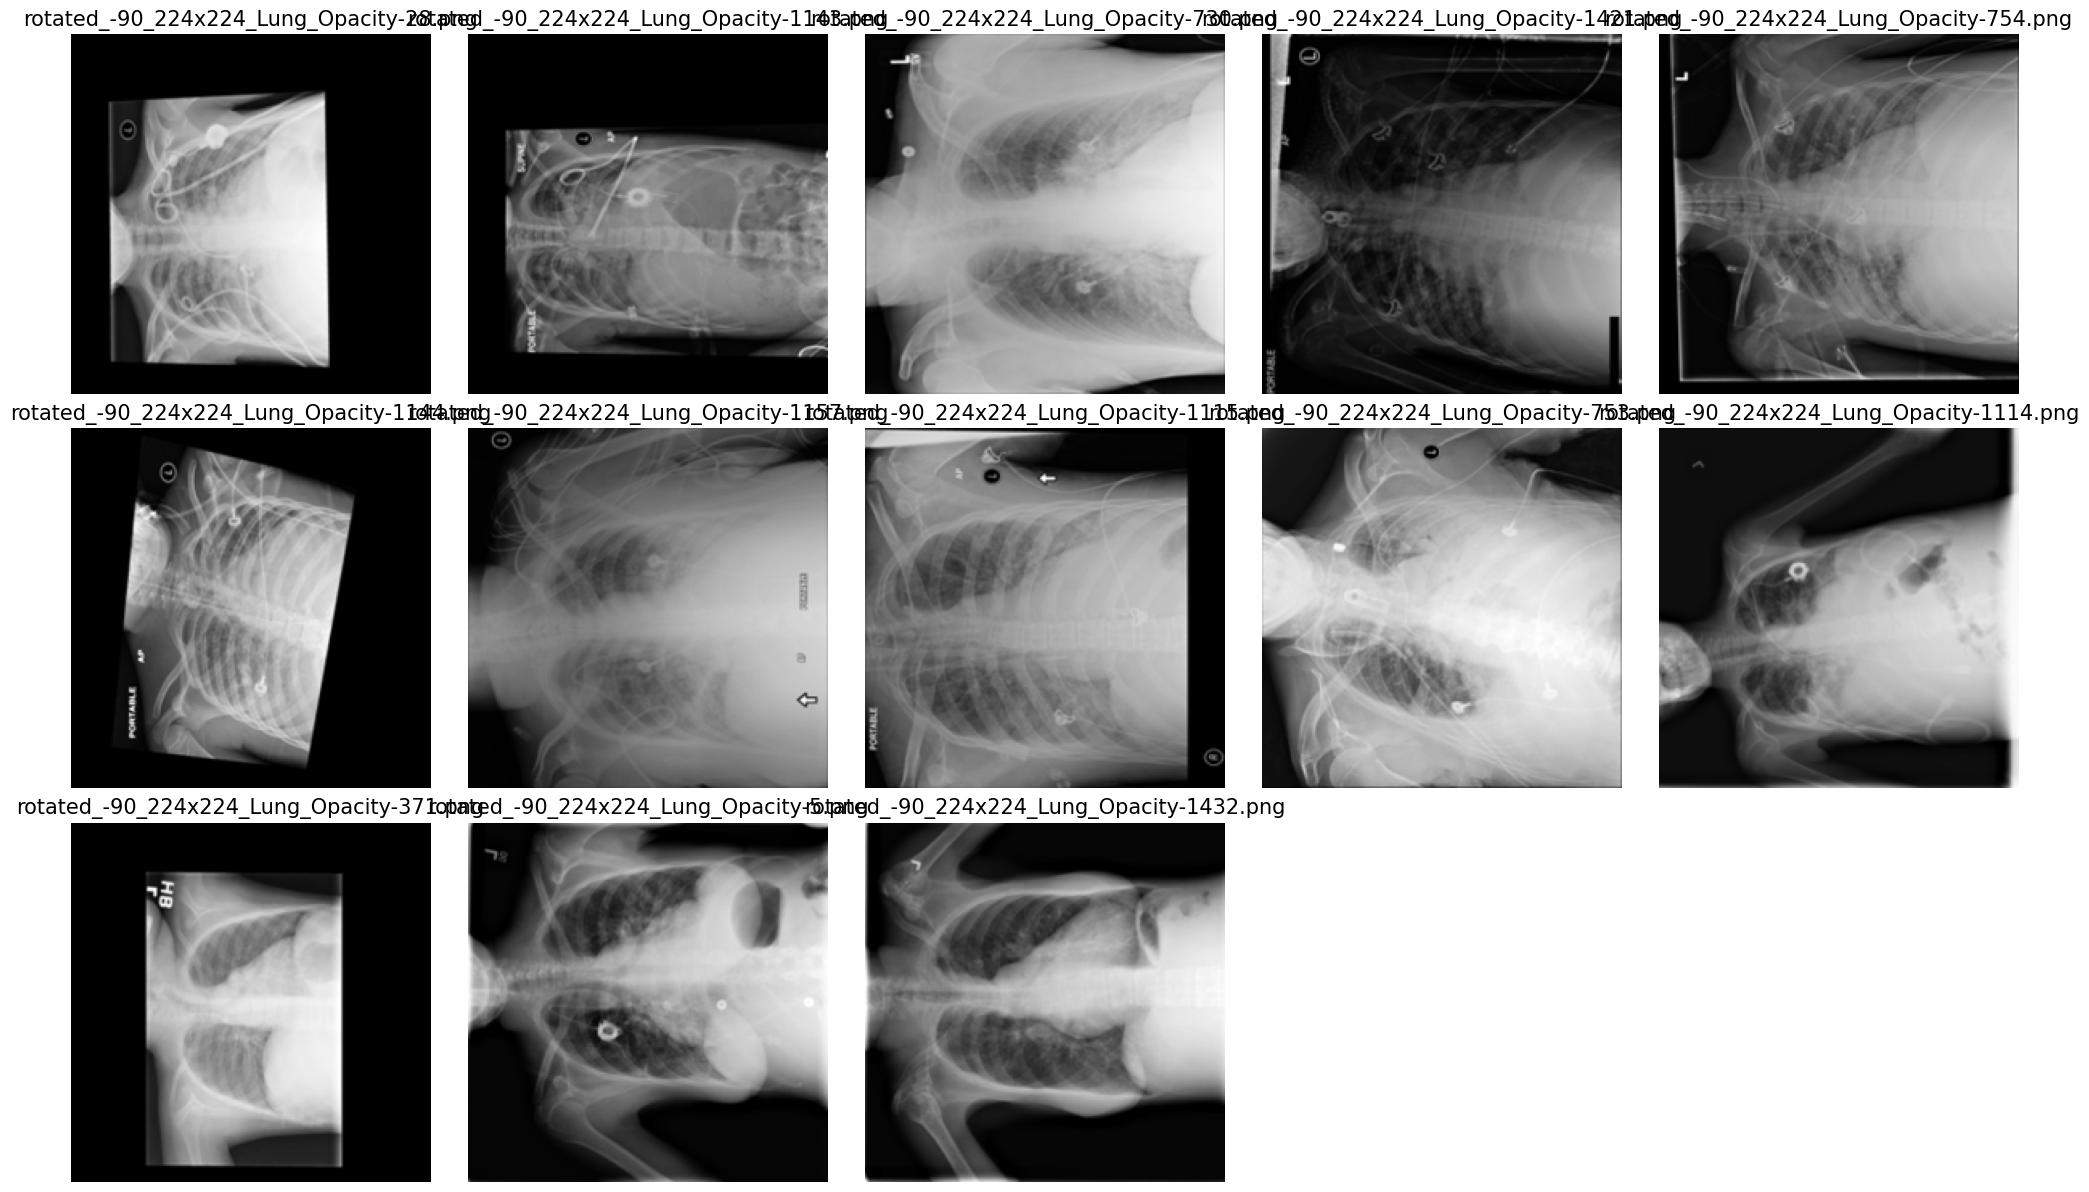


test_data --> estimated orientation: rotated_180 --> total detected: 14


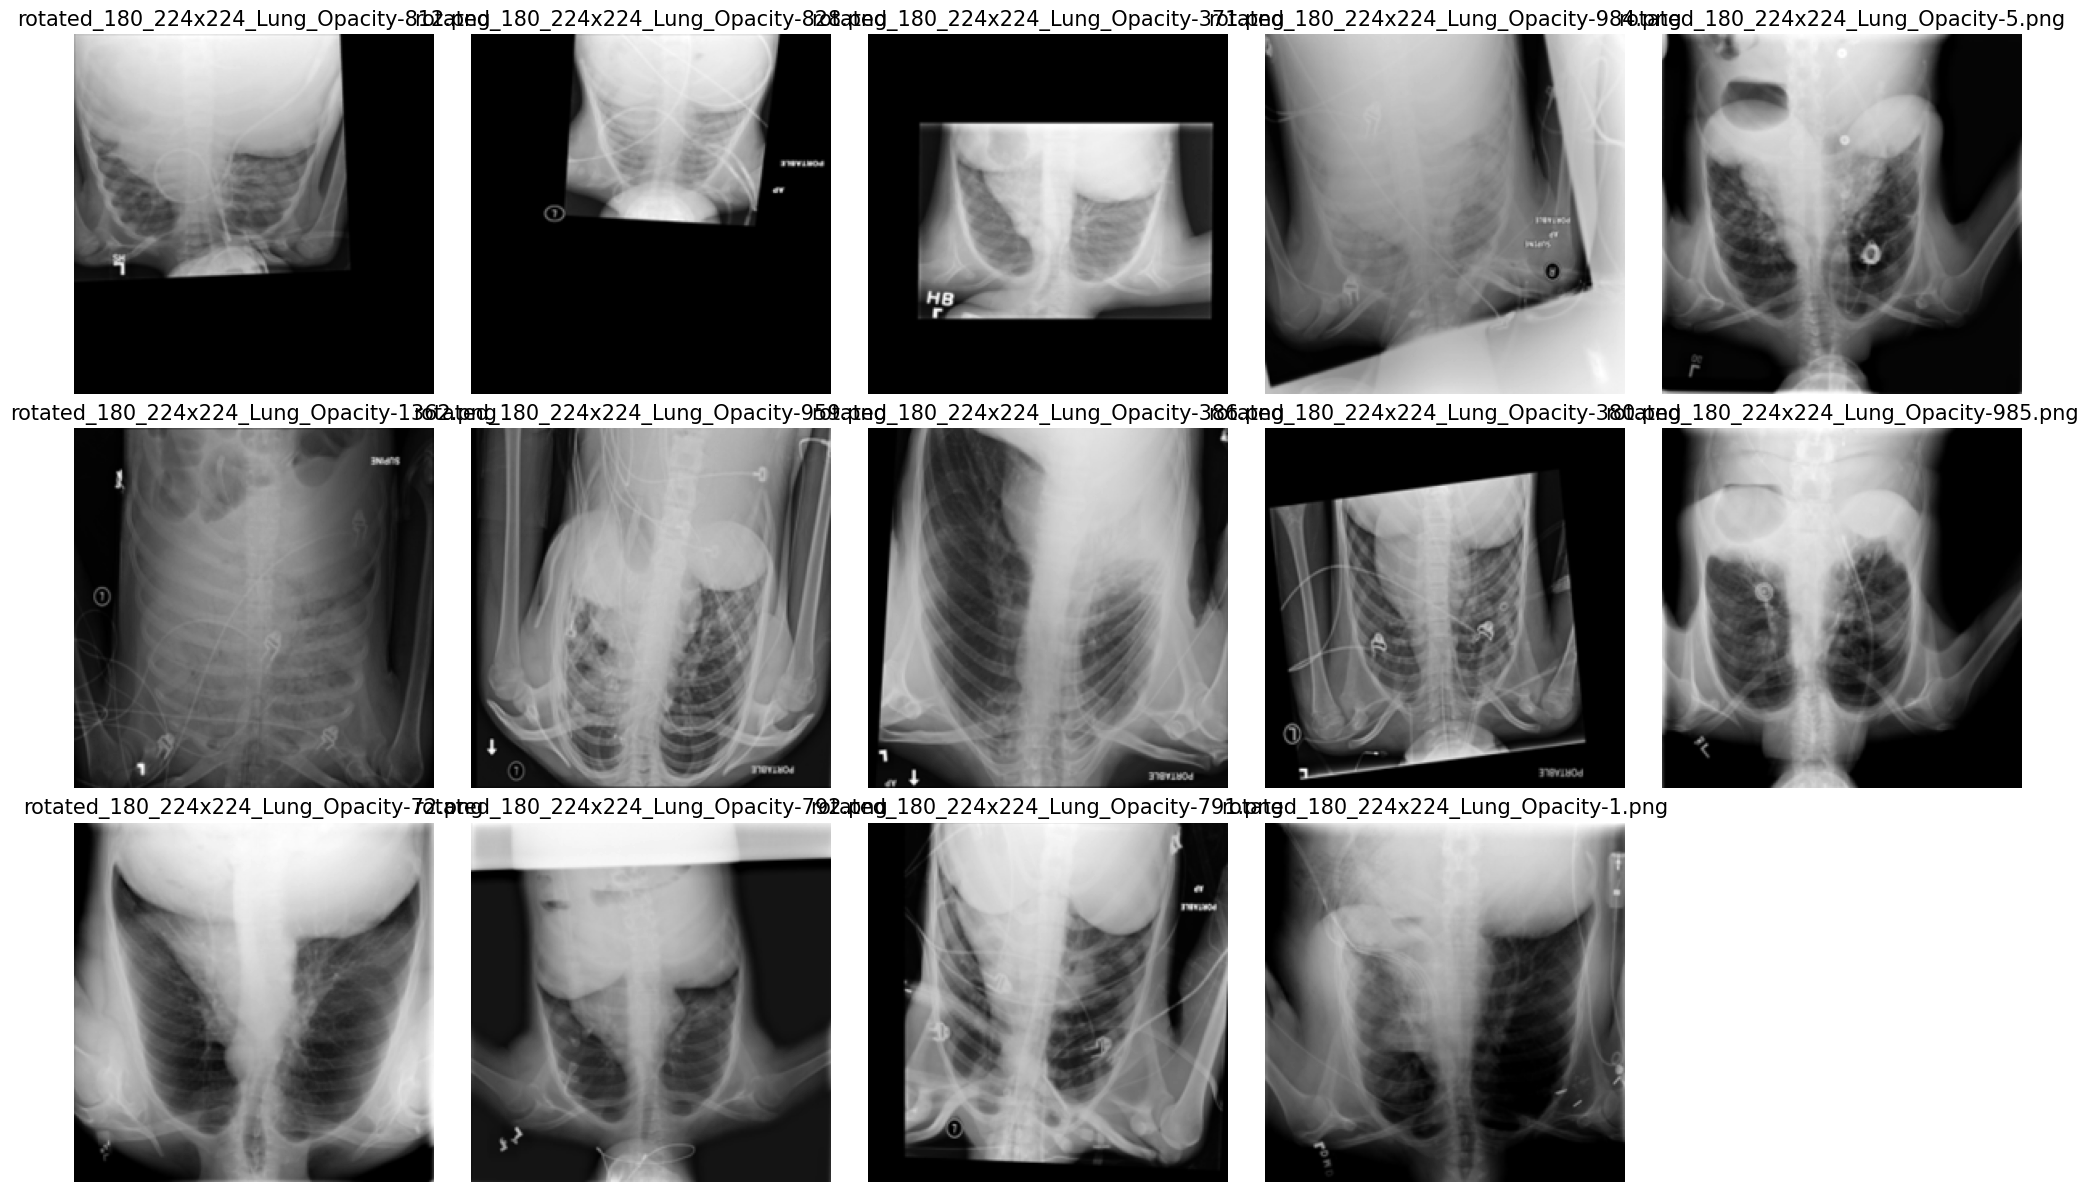

In [11]:
# Scenario 1: use this scenario for the full estimation cycle from data preparation-->training ... to checking/storing the results

# initialize trainig/validation data and check it
train_ds, val_ds = oem.prepareTrainValidData(**data_load_params)
oem.checkTrainValDataStructure()

# compile model 
model = oem.getCompiledModel(**model_params)

# train model(to uncomment) & store (to uncomment) model and history
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, LearningRateScheduler, ModelCheckpoint
from timeit import default_timer as timer
from tensorflow.keras.callbacks import Callback

class TimingCallback(Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

time_callback = TimingCallback() 
early_stopping = EarlyStopping(
                                patience=5, # Wait for 5 epochs before applying
                                min_delta=0.01, # If the loss function doesn't change by 1% after 5 epochs, either up or down, we stop
                                verbose=1, # Display the epoch at which training stops
                                mode='min',
                                monitor='val_loss')

reduce_learning_rate = ReduceLROnPlateau(
                                        monitor="val_loss",
                                        patience=2, # If val_loss stagnates for 3 consecutive epochs based on the min_delta value
                                        min_delta=0.02,
                                        factor=0.1,  # Reduce the learning rate by a factor of 0.1
                                        cooldown=2,  # Wait 4 epochs before retrying 
                                        verbose=1)



model, history = oem.train(target_val_acc=.98, epochs=40, callbacks=[time_callback, early_stopping, reduce_learning_rate])
oem.storeTrainedModel() # to uncomment to overwrite/initial saving

# show model metrics
oem.plotModelMetrics(include=["history"])

# estimate/save and check the results
df_estimated = oem.estimateImageOrientation(dataset="test", save_to_csv=True) # estimate image orientation for specified dataset
oem.checkEstimatedData(df_estimated)
oem.showRotatedImg(dataset="test")


estimated results loaded from:  estimated_orientation_224x224_mobnet_without_augment.csv
estimated as rotated: 7
estimated as correct: 21158
Estimates having confidence < 1:  18934
        Disease       Orientation  Count
0         COVID       rotated_180      4
1  Lung_Opacity        rotated_90      1
2        Normal  rotated_minus_90      2
checking for NaNs:
Image          0
Orientation    0
Confidence     0
Disease        0
dtype: int64
estimated results loaded from:  estimated_orientation_224x224_mobnet_without_augment.csv
Viral Pneumonia --> estimated orientation: rotated_90 --> total detected: 0
Viral Pneumonia --> estimated orientation: rotated_minus_90 --> total detected: 0
Viral Pneumonia --> estimated orientation: rotated_180 --> total detected: 0
estimated results loaded from:  estimated_orientation_224x224_mobnet_without_augment.csv
COVID --> estimated orientation: rotated_90 --> total detected: 0
COVID --> estimated orientation: rotated_minus_90 --> total detected: 0

COV

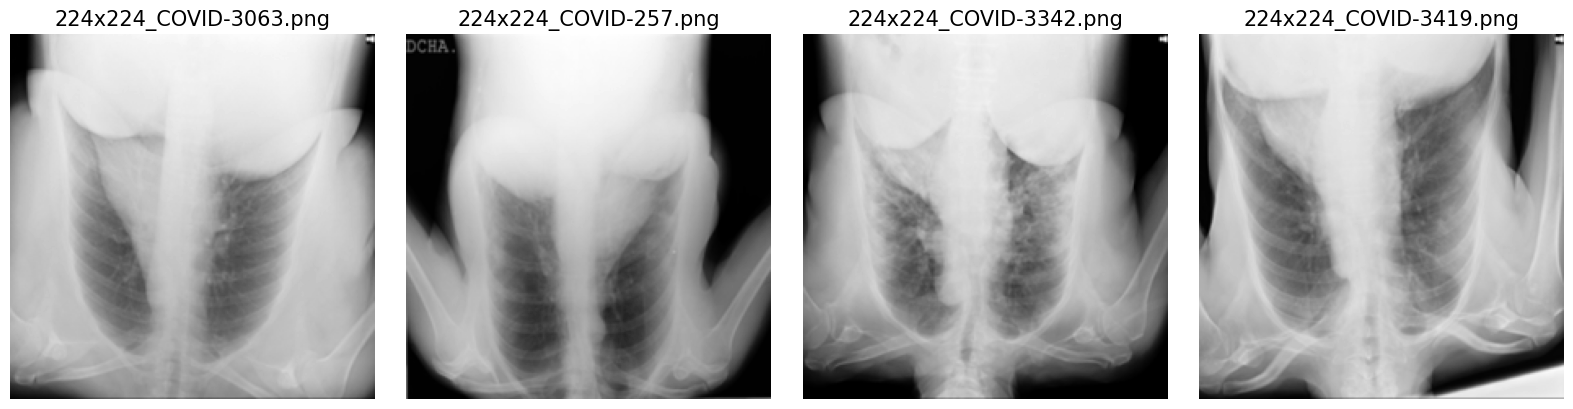

estimated results loaded from:  estimated_orientation_224x224_mobnet_without_augment.csv

Lung_Opacity --> estimated orientation: rotated_90 --> total detected: 1


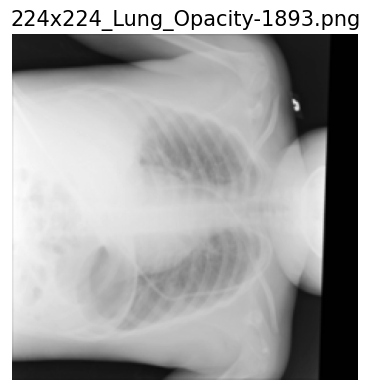

Lung_Opacity --> estimated orientation: rotated_minus_90 --> total detected: 0
Lung_Opacity --> estimated orientation: rotated_180 --> total detected: 0
estimated results loaded from:  estimated_orientation_224x224_mobnet_without_augment.csv
Normal --> estimated orientation: rotated_90 --> total detected: 0

Normal --> estimated orientation: rotated_minus_90 --> total detected: 2


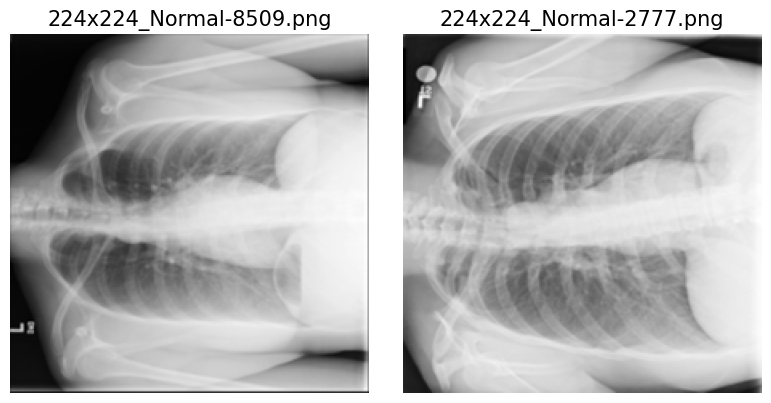

Normal --> estimated orientation: rotated_180 --> total detected: 0


In [ ]:
# Scenario 3:--> use this scenario to use saved estimated data for further analysis

dataset="data"

# load and check estimated data
df_estimated = oem.loadEstimatedData(dataset, sort_by=["Disease", "Orientation", "Confidence"])
oem.checkEstimatedData(df_estimated)
oem.showRotatedImg(dataset)



In [6]:
# Scenario 2:--> use this scenario to estimate your data using ready-to-estimate model

dataset="data"

oem.loadTrainedModel()
df_estimated = oem.estimateImageOrientation(dataset=dataset, save_to_csv=True) # estimate image orientation for specified dataset

model loaded from C:\Users\User\DataScience\area51\models\mobnet\224x224_mobnet_without_augment\orientation_classifier_224x224_mobnet_without_augment.keras
model train history loaded from C:\Users\User\DataScience\area51\models\mobnet\224x224_mobnet_without_augment\training_history_224x224_mobnet_without_augment.json
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/s

<string>:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━